In [178]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline


In [179]:
def demand(Q):
    return 1-Q

def cost(q,c):  # c is constant marginal cost
    return c*q

In [180]:
output = optimize.fsolve(lambda q: 1-2*q, 0)
print output

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(output)? (<ipython-input-180-6f017fc7c228>, line 2)

In [181]:
y

NameError: name 'y' is not defined

In [182]:
1

1

In [183]:
output = optimize.fsolve(lambda q: 1-2*q-10, 5)
print (output)


[-4.5]


In [184]:
output = optimize.fsolve(lambda q: 1-2*q, 0)
print (output)

[ 0.5]


In [187]:
def minus_profits(q,*args):         # we want to see profits as a function of q when we maximize profits or
    return -(demand(q)*q-cost(q,c)) # minimize minus_profits; hence c is specified as "*args", when calling fmin
                                    # we specify the c in the "args=(c,)"
x0 = 0
c = c = 0.0
output = optimize.brute(minus_profits,((0.0,1.0),),args=(c,)) 
print (output)
output = optimize.fmin(minus_profits,x0,args=(c,)) # note the comma in "args(c,)"; it needs to be there!
print (output)

[ 0.49995888]
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
[ 0.5]


In [188]:
c = 0.0
output = optimize.brute(minus_profits,((0.0,1.0),),args=(c,)) 
print (output)

[ 0.49995888]


In [189]:
def reaction_function(q_other,c):
    return 0.5*(1-c-q_other)

c_1 = 0.0
c_2 = 0.0

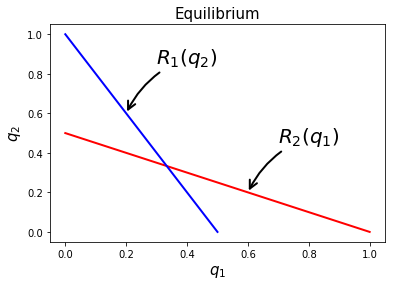

In [190]:
def reaction_function(q_other,c):
    return 0.5*(1-c-q_other)

c_1 = 0.0
c_2 = 0.0

range_q = arange(0.0,1.01,0.01)
range_reaction_1 = [reaction_function(q_2,c_1) for q_2 in range_q]
range_reaction_2 = [reaction_function(q_1,c_2) for q_1 in range_q]

plt.clf()
plt.plot(range_q, range_reaction_2,'-', color = 'r', linewidth = 2)
plt.plot(range_reaction_1, range_q,'-', color = 'b', linewidth = 2)
plt.title("Equilibrium",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation=90)
plt.annotate('$R_2(q_1)$', xy=(0.6,reaction_function(0.6,c_2)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$R_1(q_2)$', xy=(reaction_function(0.6,c_1),0.6),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )




# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('cournot_equilibrium.png')

In [27]:
pwd


'/Users/cmerino'

In [29]:
cd /desktop/


[Errno 2] No such file or directory: '/desktop/'
/Users/cmerino


In [30]:
ls


Applications/            Untitled12.ipynb         code/
Biblioteca de calibre/   Untitled13.ipynb         cournot.ipynb
Desktop/                 Untitled14.ipynb         cournot_equilibrium.png
Documents/               Untitled15-Copy1.ipynb   ejemplo.py
Downloads/               Untitled15-Copy2.ipynb   example1.log
Downloads\Tablas.tex     Untitled2.ipynb          fs2000.log
Library/                 Untitled3.ipynb          gd.xls
Movies/                  Untitled4.ipynb          helloworld.py
Music/                   Untitled5.ipynb          macports/
Pictures/                Untitled6.ipynb          octave/
Public/                  Untitled7.ipynb          octave-workspace
Untitled.ipynb           Untitled8.ipynb          oligopolio.ipynb
Untitled1.ipynb          Untitled9.ipynb          practicarems2.xlsx
Untitled10.ipynb         anaconda3/               spyder_crash.log
Untitled11.ipynb         bkk.log


In [31]:
cd Desktop


/Users/cmerino/Desktop


In [32]:
ls


PRUEBAS CON DYNARE/ basurilla/          multas/


In [33]:
cd basurilla

/Users/cmerino/Desktop/basurilla


In [34]:
ls


DSGEM                       duopolio.synctex.gz
DSGEM  alias                duopolio.synctex.gz alias
EconToolkit                 duopolio.tex
EconToolkit alias           duopolio.tex alias
EconToolkit.zip             duopoly.m
EconToolkit.zip alias       duopoly.m alias
MAX_CORE.p                  fminunc.m
MAX_CORE.p alias            fminunc.m alias
Readme.txt                  gamcdf.m
Readme.txt alias            gamcdf.m alias
Rems2_MARKUP.log            gamrnd.m
Rems2_MARKUP.log alias      gamrnd.m alias
borradores                  matlab_R2017b_maci64
borradores  alias           matlab_R2017b_maci64 alias
cdf.m                       nash.m
cdf.m alias                 nash.m alias
chi2cdf.m                   normcdf.m
chi2cdf.m alias             normcdf.m alias
cournot.jpg                 private
cournot.jpg alias           private 2
cournot.m                   private 2 alias
cournot.m alias             private alias
duopolio.aux                private.zip
duopolio.aux alias      

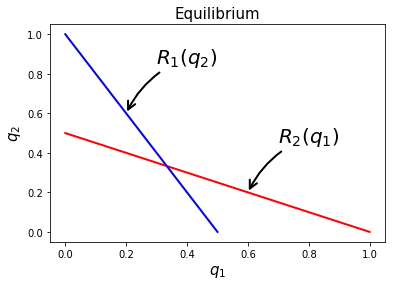

In [191]:
def minus_duopoly_profits(q,q_other,c):
    return -(demand(q+q_other)*q-cost(q,c)) 


def new_reaction_function(q_other,c):
    x0 = 0
    output = optimize.fmin(lambda q: minus_duopoly_profits(q,q_other,c),x0,disp = False) # disp = False reduces 
    return output[0]                                                                     # the output of the routine
                                                                                         # disp = True shows the difference
c_1 = 0.0
c_2 = 0.0

range_q = arange(0.0,1.01,0.01)
range_reaction_1 = [new_reaction_function(q_2,c_1) for q_2 in range_q]
range_reaction_2 = [new_reaction_function(q_1,c_2) for q_1 in range_q]

plt.clf()
plt.plot(range_q, range_reaction_2,'-', color = 'r', linewidth = 2)
plt.plot(range_reaction_1, range_q,'-', color = 'b', linewidth = 2)
plt.title("Equilibrium",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.annotate('$R_2(q_1)$', xy=(0.6,reaction_function(0.6,c_2)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$R_1(q_2)$', xy=(reaction_function(0.6,c_1),0.6),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )




# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('cournot_equilibrium2.png')

In [192]:
def vector_reaction_function(q,c): # q is a vector (or list in python) here
    x0 = 0
    output_1 = optimize.fmin(lambda q1: minus_duopoly_profits(q1,q[1],c[0]),x0)
    output_2 = optimize.fmin(lambda q2: minus_duopoly_profits(q2,q[0],c[1]),x0)
    return [output_1[0],output_2[0]]   

In [40]:
c = [0.0,0.0]
optimize.fsolve(lambda q: q-vector_reaction_function(q,c), [0,0])

Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
Optimization terminated suc

array([ 0.3333125,  0.3333125])

In [193]:
def n_reaction_function(q,c): # q is a vector (or list in python) here
    n = len(q) # number of firms
    firms = range(n) # create a list with n firm identities (0,1,...,n-1)
    x0 = 0 # initial guess for a firm's optimal output level --given what the others do
    total_output = sum(q)
    output = [] # we create an empty list of optimal reactions `output`, and add the optimal reaction of each firm to it
    for firm in firms: # we use the duopoly profits with q_other = \sum_{j \neq i} q_j = \sum_{j} q_j - q_i
        output.append(optimize.fmin(lambda x: minus_duopoly_profits(x,total_output-q[firm],c[firm]),x0,disp = False)[0])
    return output

In [194]:
c = [0.0,0.0,0.0,0.0] # consider the case with 4 firms in the market each with c = 0
optimize.fsolve(lambda q: q-n_reaction_function(q,c), [0,0,0,0])

array([ 0.2,  0.2,  0.2,  0.2])

In [195]:
total_output

NameError: name 'total_output' is not defined

In [196]:
output

array([ 0.49995888])

x^2+14*y-pi

In [197]:
2*x

2

x^2

10**100

10**10

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
def my_first_function(x):
    n=10
    return x**n

In [200]:
x=1

In [201]:
2

2

In [205]:
my_first_function(90)
from scipy import arange

range_x = arange(-2.0,2.1,0.1)
print (range_x)

[ -2.00000000e+00  -1.90000000e+00  -1.80000000e+00  -1.70000000e+00
  -1.60000000e+00  -1.50000000e+00  -1.40000000e+00  -1.30000000e+00
  -1.20000000e+00  -1.10000000e+00  -1.00000000e+00  -9.00000000e-01
  -8.00000000e-01  -7.00000000e-01  -6.00000000e-01  -5.00000000e-01
  -4.00000000e-01  -3.00000000e-01  -2.00000000e-01  -1.00000000e-01
   1.77635684e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01   1.00000000e+00   1.10000000e+00
   1.20000000e+00   1.30000000e+00   1.40000000e+00   1.50000000e+00
   1.60000000e+00   1.70000000e+00   1.80000000e+00   1.90000000e+00
   2.00000000e+00]


In [59]:
from scipy import arange

range_x = arange(-2.0,2.1,0.1)
print (range_x)

[ -2.00000000e+00  -1.90000000e+00  -1.80000000e+00  -1.70000000e+00
  -1.60000000e+00  -1.50000000e+00  -1.40000000e+00  -1.30000000e+00
  -1.20000000e+00  -1.10000000e+00  -1.00000000e+00  -9.00000000e-01
  -8.00000000e-01  -7.00000000e-01  -6.00000000e-01  -5.00000000e-01
  -4.00000000e-01  -3.00000000e-01  -2.00000000e-01  -1.00000000e-01
   1.77635684e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01   1.00000000e+00   1.10000000e+00
   1.20000000e+00   1.30000000e+00   1.40000000e+00   1.50000000e+00
   1.60000000e+00   1.70000000e+00   1.80000000e+00   1.90000000e+00
   2.00000000e+00]


In [60]:
plot?

Object `plot` not found.


In [206]:
range_y = [my_first_function(x) for x in range_x]
print (range_y)lt.clf() # starts a new graph
plt.plot(range_x, range_y,'-', color = 'b', linewidth = 2) # play around with colors like 'r', or styles like '--'
plt.title("Parabola",fontsize = 15)
plt.xlabel("$x$",fontsize = 15)
plt.ylabel("$y$",fontsize = 15)
plt.xlim(-2.0,2.0)
plt.ylim(0.0,4.0)
plt.annotate('$y=x^2$', xy=(1.0,my_first_function(1.0)),  xycoords='data',
              xytext=(-60, 60), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )

plt.savefig('my_first_graph.png')

SyntaxError: invalid syntax (<ipython-input-206-e329faa5df29>, line 2)

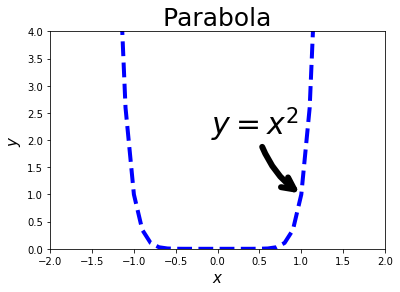

In [207]:
plt.clf() # starts a new graph
plt.plot(range_x, range_y,'--', color = 'b', linewidth = 4) # play around with colors like 'r', or styles like '--'
plt.title("Parabola",fontsize = 25)
plt.xlabel("$x$",fontsize = 15)
plt.ylabel("$y$",fontsize = 15)
plt.xlim(-2.0,2.0)
plt.ylim(0.0,4.0)
plt.annotate('$y=x^2$', xy=(1.0,my_first_function(1.0)),  xycoords='data',
              xytext=(-90, 60), textcoords='offset points', size = 30,
              arrowprops=dict(arrowstyle="->", linewidth = 6,
                              connectionstyle="arc3,rad=.2"),
              )

plt.savefig('my_first_graph.png')

In [208]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
def demand(x1,x2,b):
    return 1-x1-b*x2

def cost(x,c):
    if x == 0:
     cost = 0
    else:
     cost = c*x
    return cost

In [210]:
def profit(x1,x2,c1,b):
    return demand(x1,x2,b)*x1-cost(x1,c1)

In [211]:
def reaction(x2,c1,b):
    x1 = optimize.brute(lambda x: -profit(x,x2,c1,b), ((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return x1[0]

In [212]:
def vector_reaction(x,param): # vector param = (b,c1,c2)
    return array(x)-array([reaction(x[1],param[1],param[0]),reaction(x[0],param[2],param[0])])

In [213]:
param = [1.0,0.0,0.0]
x0 = [0.3, 0.3]

ans = optimize.fsolve(vector_reaction, x0, args = (param))
print (ans)

[ 0.33332648  0.33332648]


In [214]:
def collusion_profits(x,b,c,delta): # we only do this for the symmetric case: c1 = c2 = c
    profits = profit(x,x,c,b)
    ans = optimize.fsolve(vector_reaction, x0, args = ([b,c,c]))
    if profits >= (1-delta)*profit(reaction(x,c,b),x,c,b)+delta*profit(ans[0],ans[1],c,b):
        industry_profits = 2*profits # profits can be sustained as collusion profits
    else:
        industry_profits = 0 # profits cannot be sustained as collusion profits
    return industry_profits

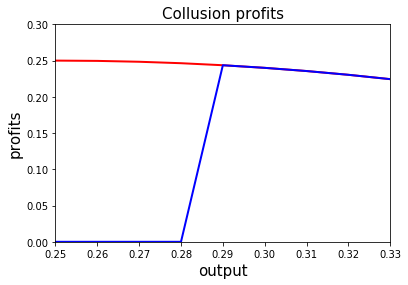

In [215]:
range_x = arange(0.25,ans[0],0.01)
delta1 = 0.8
delta2 = 0.3
range_profits = [collusion_profits(x,1.0,0.0,delta1) for x in range_x]
range_profits2 = [collusion_profits(x,1.0,0.0,delta2) for x in range_x]

plt.clf()
 
plt.plot(range_x, range_profits,'-', color = 'r', linewidth = 2)
plt.plot(range_x, range_profits2,'-', color = 'b', linewidth = 2)
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("output",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)
plt.xlim(0.25,0.33)
plt.ylim(0.0,0.3)
plt.savefig('collusion.png')

bertrand

In [216]:
def u(p,n): # utility for consumer who values good at n
    return n-p

consumer_types = arange(0.0,1.01,0.01) # 100 consumers with n varying between 0 and 1

def buy(p,n):
    if u(p,n) >= 0:
        buy = 1.0
    else:
        buy = 0.0
    return buy

def total_demand(p): # total demand equals the sum of demands of consumers n for all consumer_types
    demand_vector = [buy(p,n)/len(consumer_types) for n in consumer_types]
    return sum(demand_vector)

In [217]:
def profit(p1,p2,c1):
    if p1 > p2:
        profits = 0
    elif p1 == p2:
        profits = 0.5*total_demand(p1)*(p1-c1)
    else:
        profits = total_demand(p1)*(p1-c1)
    return profits

def reaction(p2,c1):
    if p2 > c1:
        reaction = c1+0.8*(p2-c1)
    else:
        reaction = c1
    return reaction

In [218]:
def vector_reaction(p,param): # vector param = (c1,c2)
    return array(p)-array([reaction(p[1],param[0]),reaction(p[0],param[1])])

param = [0.0,0.0] # c1 = c2 =0
p0 = [0.5, 0.5] # initial guess: p1 = p2 = 0.5

ans = optimize.fsolve(vector_reaction, p0, args = (param))
print (ans)

[  4.94065646e-324   4.94065646e-324]


In [219]:
def collusion_profits(p,c,delta): # we only do this for the symmetric case: c1 = c2 = c
    profits = profit(p,p,c)
    ans = optimize.fsolve(vector_reaction, p0, args = ([c,c]))
    if profits >= (1-delta)*2*profits+delta*profit(ans[0],ans[1],c):
        industry_profits = 2*profits
    else:
        industry_profits = 0
    return industry_profits

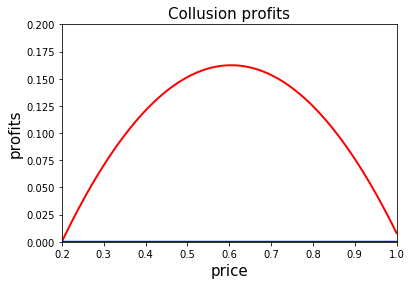

In [232]:
c = 0.2
range_p = arange(0.0,1.01,0.01)
delta1 = 0.8
delta2 = 0.2

range_profits = [collusion_profits(p,c,delta1) for p in range_p]
range_profits_2 = [collusion_profits(p,c,delta2) for p in range_p]

plt.clf()
plt.plot(range_p, range_profits,'-', color = 'r', linewidth = 2)
plt.plot(range_p, range_profits_2,'-', color = 'b', linewidth = 2)
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("price",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)
plt.xlim(c,1.0)
plt.ylim(0.0,0.2)
plt.savefig('collusion_Bertrand.png')

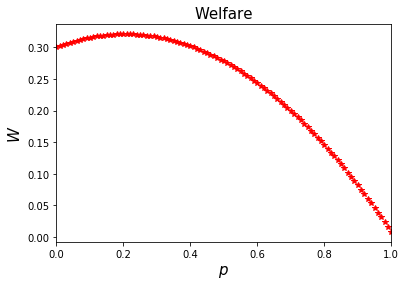

In [227]:
def welfare(p):
    welfare = sum([u(c,n)*buy(p,n)/len(consumer_types) for n in consumer_types])
    return welfare

range_welfare = [welfare(p) for p in range_p]

plt.clf()
 
plt.plot(range_p, range_welfare,'*', color = 'r', linewidth = 2)
plt.title("Welfare",fontsize = 15)
plt.xlabel("$p$",fontsize = 15)
plt.ylabel("$W$",fontsize = 15)
plt.xlim(0.0,1.0)
plt.savefig('welfare.png')

simulación de concentraciones


In [244]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in
        IPython Notebook. """

    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")

            for col in row:
                html.append("<td>{0}</td>".format(col))

            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
from math import log
%matplotlib inline

In [253]:
market_share = {} # creates a dictionary with market shares
elasticity = {}   # dictionaries of firm level own and cross elasticities

firms = ['firm1','firm2','firm3'] # names of the firms in a python list
market_share['firm2'] = 0.3
market_share['firm3'] = 0.5
market_share['firm1'] = 1 - sum(market_share[firm] for firm in ['firm2','firm3'])

for firm in firms:
    if (market_share[firm] >= 0 and market_share[firm] <= 1):
        print ("market share of firm: " +firm+  " is given by %1.2f" % market_share[firm])
    else: print ("something wrong with the market share of the firm: ")+firm

market_elasticity = -1.0 # market demand elasticity
elasticity['firm1','firm1'] = -3.0 # own elasticity of firm1

if market_elasticity < elasticity['firm1','firm1']:
    print ("error: the market elasticity exceeds (in absolute value) a firm's own elasticity")

market share of firm: firm1 is given by 0.20
market share of firm: firm2 is given by 0.30
market share of firm: firm3 is given by 0.50


In [235]:
margin = {}
for firm in firms:
    margin[firm] = -1.0/elasticity[firm,firm]


KeyError: ('firm2', 'firm2')

In [236]:
print "market share of firm: "+ firm + " is given by %1.2f" % market_share[firm]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("market share of firm: "+ firm + " is given by %1.2f" % market_share[firm])? (<ipython-input-236-32e8cda11c1a>, line 1)

In [237]:
print("market share of firm: "+ firm + " is given by %1.2f" % market_share[firm])

market share of firm: firm2 is given by 0.30


In [254]:
b = {} # dictionary of b-coefficients of demand system (D) above 
b['firm1','firm1'] = market_share['firm1']*(elasticity['firm1','firm1']+1-market_share['firm1']*(market_elasticity+1))

for firm in firms:
    b[firm,firm]=(market_share[firm]*(1-market_share[firm]))/(market_share['firm1']*(1-market_share['firm1']))*b['firm1','firm1']

for one_firm in firms:
    for other_firm in firms:
        if one_firm == other_firm:
            b[one_firm,one_firm]=(market_share[one_firm]*(1-market_share[one_firm]))/(market_share['firm1']*(1-market_share['firm1']))*b['firm1','firm1']
        else:
            b[one_firm,other_firm] = - market_share[one_firm]/(1-market_share[other_firm])*b[other_firm,other_firm]
            
for one_firm in firms:
    for other_firm in firms:
        if one_firm == other_firm:
            elasticity[one_firm,one_firm] = -1 + b[one_firm,one_firm]/market_share[one_firm]+market_share[one_firm]*(market_elasticity+1)
        else:
            elasticity[one_firm,other_firm] = b[one_firm,other_firm]/market_share[one_firm]+market_share[other_firm]*(market_elasticity+1)

table = ListTable()
table.append(['b-coeff.', 'firm1','firm2','firm3'])
for one_firm in firms:
    row = []
    row.append(one_firm)
    for other_firm in firms:
        row.append("%0.3f" % b[one_firm,other_firm])
    table.append(row)
print ("table of b coefficients:")
table

table of b coefficients:


b-coeff.,firm1,firm2,firm3
firm1,-0.400,0.150,0.250
firm2,0.150,-0.525,0.375
firm3,0.250,0.375,-0.625


In [255]:
table = ListTable()
table.append(['elast.', 'firm1','firm2','firm3'])
for one_firm in firms:
    row = []
    row.append(one_firm)
    for other_firm in firms:
        row.append("%0.3f" % elasticity[one_firm,other_firm])
    table.append(row)
print ("table of elasticities:")
table

table of elasticities:


elast.,firm1,firm2,firm3
firm1,-3.000,0.750,1.250
firm2,0.500,-2.750,1.250
firm3,0.500,0.750,-2.250


In [256]:
margin = {}
for firm in firms:
    margin[firm] = -1.0/elasticity[firm,firm]

    
merging_firms = ['firm1','firm2']                      # list of the merging firms
nonmerging_firms = list(set(firms)-set(merging_firms)) # list of non-merging firms
efficiency_gains = {} # dictionary with efficiency gains --due to the merger-- for the firms
for firm in merging_firms:
    efficiency_gains[firm] = 0.0
for firm in nonmerging_firms:
    efficiency_gains[firm] = 0.0

In [171]:
post_marketshare = {}
post_elasticity = {}
post_margin = {}
price_change = {}

def vector_function(post_marketshare,post_elasticity,post_margin,price_change):
    equations = []
    for firm in sorted(firms):
        equations.append(post_marketshare[firm]-(market_share[firm]+sum([b[firm,other_firm]*log(1+price_change[other_firm]) for other_firm in firms])))
        equations.append(post_margin[firm] - (1-(1+efficiency_gains[firm])/(1+price_change[firm])*(1-margin[firm])))
    for firm in sorted(nonmerging_firms):
        equations.append(post_margin[firm] + 1/post_elasticity[firm,firm])
        equations.append(post_elasticity[firm,firm] - (-1 + b[firm,firm]/post_marketshare[firm]+post_marketshare[firm]*(market_elasticity+1)))
    for firm in sorted(merging_firms):
        equations.append(post_marketshare[firm]+sum(post_elasticity[other_firm,firm]*post_marketshare[other_firm]*post_margin[other_firm] for other_firm in sorted(merging_firms)))
        for other_firm in sorted(merging_firms):
            equations.append(post_elasticity[firm,other_firm] - (-(firm==other_firm) + b[firm,other_firm]/post_marketshare[firm]+post_marketshare[other_firm]*(market_elasticity+1)))
    return equations

In [257]:
def wrapper_function(x): # the solver used below needs a vector x as input, not a collection of dictionaries
    counter = 0
    for dict in [post_marketshare,post_margin,price_change]:
        for firm in sorted(firms):
            dict[firm] = x[counter]
            counter +=1
    for firm in sorted(nonmerging_firms):
        post_elasticity[firm, firm] = x[counter]
        counter +=1
    for firm in sorted(merging_firms):
        for other_firm in sorted(merging_firms):
            post_elasticity[firm, other_firm] = x[counter]
            counter +=1
    return vector_function(post_marketshare,post_elasticity,post_margin,price_change)

def unwrap(x):   # once we have the equilibrium solution as a vector x, we go back to dictionaries 
    counter = 0  # as they are easier to work with
    for dict in [post_marketshare,post_margin,price_change]:
        for firm in sorted(firms):
            dict[firm] = x[counter]
            counter +=1
    for firm in sorted(nonmerging_firms):
        post_elasticity[firm, firm] = x[counter]
        counter +=1
    for firm in sorted(merging_firms):
        for other_firm in sorted(merging_firms):
            post_elasticity[firm, other_firm] = x[counter]
            counter +=1
    return [post_marketshare,post_elasticity,post_margin,price_change]

In [258]:
def initial_value(): # initial value based on before merger values
    x = []
    for dict in [market_share,margin]:
        for firm in sorted(firms):
            x.append(dict[firm])
    for firm in sorted(firms):
        x.append(0.0) # price change
    for firm in sorted(nonmerging_firms):
        x.append(elasticity[firm, firm])
    for firm in sorted(merging_firms):
        for other_firm in sorted(merging_firms):
            x.append(elasticity[firm, other_firm])
    return x

In [259]:
def after_merger_values():
    outcome = unwrap(optimize.fsolve(wrapper_function, initial_value()))
    table = ListTable()
    table.append(['firm', 'marketshare','margin','price increase'])
    for firm in firms:
        table.append([firm, "%0.3f" % outcome[0][firm],"%0.3f" % outcome[2][firm],"%0.3f" % outcome[3][firm]])
    print ("table of post merger outcomes:")
    return table

In [260]:
after_merger_values()

table of post merger outcomes:


firm,marketshare,margin,price increase
firm1,0.174,0.414,0.138
firm2,0.281,0.425,0.108
firm3,0.546,0.466,0.041


In [130]:
margin

NameError: name 'margin' is not defined

In [169]:
print("margin" margin)

SyntaxError: invalid syntax (<ipython-input-169-1bd46d7bb980>, line 1)

In [165]:
 print ("table of post merger outcomes:")

table of post merger outcomes:


In [147]:
table.append([firm, "%0.3f" % outcome[0][firm],"%0.3f" % outcome[2][firm],"%0.3f" % outcome[3][firm]])

NameError: name 'outcome' is not defined

In [151]:
conda update anaconda3

SyntaxError: invalid syntax (<ipython-input-151-f793b7dc6d8d>, line 1)

In [155]:
margin = {}
for firm in firms:
    margin[firm] = -1.0/elasticity[firm,firm]

KeyError: ('firm2', 'firm2')